# Students’ Early Attrition Modelling For Clearwater State University

In [1]:
#Importing the libraries/packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
#Import and Store the data as DataFrame
data_dir='F:\Final_Practise\capstone_python'
os.chdir(data_dir)

In [4]:
#Store the data as dataframe
hr_data=pd.read_excel('Student Applications & Performance.xlsx')

In [5]:
#Print the first few observation of the data in order to get better understanding.
pd.set_option('display.max_columns', None) # To display all the columns in the dataset.
hr_data.head(10)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
5,7815697,18,M,BGD 1,Y,N,Political Science,N,NaN,1050.0,1070.0,201008,ARAB 1001,A,HIST 2112,A,MATH 1101,A,MUSC 1100,A,PSYC 1101,A,NaN,NaN,201102,BIOL 1215K,A,ENGL 1101,A,ITDS 1156,A,POLS 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,4.00,SCHOOL 5,2.0,High School,3.0,College/Beyond,B,Bachelors,15,15,16.0,16.0,0,0,0,0.0
6,7838856,18,F,BGD 1,Y,N,Biology,N,NaN,580.0,590.0,200508,ARTH 1100,A,CHEM 1211,A,CHEM 1211L,A,ENGL 1101,A,HIST 2111,A,MATH 1113,A,200602,ENGL 1102,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.93,SCHOOL 2,NaN,No Information,NaN,No Information,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
7,7960448,18,F,BGD 1,Y,N,Biology,N,NaN,750.0,740.0,200508,ARTH 1100,A,CHEM 1211,A,CHEM 1211L,A,ENGL 1101,A,NaN,NaN,NaN,NaN,200602,ENGL 1102,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,4.00,SCHOOL 130,NaN,No Information,NaN,No Information,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
8,7944779,18,F,BGD 3,Y,N,Accounting,N,NaN,1060.0,1070.0,200508,ARTH 1100,A,COMM 1110,A,ITDS 2735,A,POLS 1101,A,NaN,NaN,NaN,NaN,200602,ECON 2105,A,ENGL 1102,A,MATH 1111,A,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,150.0,4.00,SCHOOL 54,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
9,7902044,18,F,BGD 1,Y,N,Undeclared,N,NaN,NaN,NaN,200608,ARTH 1100,A,COMM 1110,A,ENGL 1101,A,MATH 1111,A,NaN,NaN,NaN,NaN,200702,ENGL 1102,A,HIST 2111,A,LEAD 1705,A,PSYC 11

In [6]:
#Check the number of rows and colums 
hr_data.shape  #Implies 3400 studennts with 56 data points for each employee

(3400, 56)

In [7]:
#Check the column data types
hr_data.dtypes   #There are datatypes with integers, float, and objects.

STUDENT IDENTIFIER            int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
INTERNATIONAL_STS            object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE1        float64
STDNT_TEST_ENTRANCE2        float64
STDNT_TEST_ENTRANCE_COMB    float64
FIRST_TERM                    int64
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
CORE_COURSE_NAME_4_F         object
CORE_COURSE_GRADE_4_F        object
CORE_COURSE_NAME_5_F         object
CORE_COURSE_GRADE_5_F        object
CORE_COURSE_NAME_6_F         object
CORE_COURSE_GRADE_6_F        object
SECOND_TERM                   int64
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S        

In [8]:
#Get the count of the Missing values for each column
hr_data.isna().sum()   #From the below output there are missing values in columns such as STDNT_TEST_ENTRANCE1, STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_6_S and few others.

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [9]:
#Check for any missning /null values in the dataset.
hr_data.isnull().values.any()  # True here implies data columns has some missing/null values.

True

In [10]:
#Checking some summary statistics on dataset.
hr_data.describe()  ## Gives summary of the data set as shown below like mean, std deviation, median etc.

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [11]:
#Get the missing values by percentage for each column in the dataset.
#It is observed that many columns has missing values greater than 5%, ensure that there should be no missing values in the dataset.
((hr_data.isnull() | hr_data.isna()).sum() * 100 / hr_data.index.size).round(2)

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE1        67.47
STDNT_TEST_ENTRANCE2        26.71
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
CORE_COURSE_NAME_4_F        46.97
CORE_COURSE_GRADE_4_F       46.97
CORE_COURSE_NAME_5_F        81.03
CORE_COURSE_GRADE_5_F       81.03
CORE_COURSE_NAME_6_F        96.24
CORE_COURSE_GRADE_6_F       96.24
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.82
CORE_COURSE_NAME_2_S        12.91
CORE_COURSE_GRADE_2_S       12.91
CORE_COURSE_NA

# Data Preparation and Missing value Treatment

##### DATA PREPARATION

In [12]:
#Dataset contains more than 30 colums/large data so applying percentile cutoff
#Dropping Columns with more than 20% missing values

hr_cols=hr_data.columns.tolist()

for i in range(len(hr_cols)):
    if ((hr_data[hr_cols[i]].isnull().sum()/hr_data.shape[0])*100)>20:
        hr_data=hr_data.drop(hr_cols[i],axis=1)

In [13]:
print(hr_data.shape)
#Check the remaining columns, there are 40 columns remaining after removing columns with more than 20% missing value.
hr_data.head()

(3400, 40)


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,200802,CHEM 1151,A,CHEM 1151L,A,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,200902,ECON 2105,A,ENGL 1102,A,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,201102,ENGL 1102,A,ENVS 1105,A,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,200902,COMM 1110,A,ENGL 1101,A,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [14]:
#After dropping columns with more than 20% missing valuses,get the missing values by percentage for each column. 
((hr_data.isnull() | hr_data.isna()).sum() * 100 / hr_data.index.size).round(2) # Gives the missing values in percentage coount as shown below.

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.82
CORE_COURSE_NAME_2_S        12.91
CORE_COURSE_GRADE_2_S       12.91
HOUSING_STS                  0.00
RETURNED_2ND_YR              0.00
DISTANCE_FROM_HOME           0.74
HIGH_SCHL_GPA                1.56
HIGH_SCHL_NAME               0.03
FATHER_HI_EDU_CD            12.71
FATHER_HI_EDU_DESC           0.00
MOTHER_HI_EDU_CD            14.38
MOTHER_HI_EDU_

In [15]:
#Dropping rows with less than 3% of missing values, this helps in avoiding missing value treatment,and makes the dataset close to real scenerio.
#hr_data.dropna(subset=['CORE_COURSE_NAME_2_F'],inplace=True)
hr_data.dropna(subset=['HIGH_SCHL_NAME'],inplace=True)

In [16]:
#Get the missing values by percentage for each column. 
#Notice there are few columns with the missing values
((hr_data.isnull() | hr_data.isna()).sum() * 100 / hr_data.index.size).round(2)

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.83
CORE_COURSE_NAME_2_S        12.92
CORE_COURSE_GRADE_2_S       12.92
HOUSING_STS                  0.00
RETURNED_2ND_YR              0.00
DISTANCE_FROM_HOME           0.74
HIGH_SCHL_GPA                1.53
HIGH_SCHL_NAME               0.00
FATHER_HI_EDU_CD            12.71
FATHER_HI_EDU_DESC           0.00
MOTHER_HI_EDU_CD            14.39
MOTHER_HI_EDU_

In [17]:
print(hr_data.shape)

(3399, 40)


#### MISSING VALUE TREATMENT

In [18]:
#Treating continuous variabels columns namely #DISTANCE_FROM_HOME #HIGH_SCHL_GPA 
print(np.mean(hr_data['DISTANCE_FROM_HOME']))
print(np.mean(hr_data['HIGH_SCHL_GPA']))

99.83432128037937
3.202737526142809


In [19]:
#Since Column 'DISTANCE_FROM_HOME' has 0.74% missing values, filling these missing values with mean value of the respected column.
hr_data['DISTANCE_FROM_HOME']=hr_data['DISTANCE_FROM_HOME'].fillna(np.mean(hr_data['DISTANCE_FROM_HOME']))

In [20]:
#Filling these missing values in column 'HIGH_SCHL_GPA' with mean value of the same column.
hr_data['HIGH_SCHL_GPA']=hr_data['HIGH_SCHL_GPA'].fillna(np.mean(hr_data['HIGH_SCHL_GPA']))

In [21]:
#Check for missing values by percentage for each column, we can see here that there are few more columns with the missing values.
((hr_data.isnull() | hr_data.isna()).sum() * 100 / hr_data.index.size).round(2)

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.83
CORE_COURSE_NAME_2_S        12.92
CORE_COURSE_GRADE_2_S       12.92
HOUSING_STS                  0.00
RETURNED_2ND_YR              0.00
DISTANCE_FROM_HOME           0.00
HIGH_SCHL_GPA                0.00
HIGH_SCHL_NAME               0.00
FATHER_HI_EDU_CD            12.71
FATHER_HI_EDU_DESC           0.00
MOTHER_HI_EDU_CD            14.39
MOTHER_HI_EDU_

In [22]:
#Get the mean values for the missing columns
print(np.mean(hr_data['STDNT_TEST_ENTRANCE_COMB']))
print(np.mean(hr_data['FATHER_HI_EDU_CD']))
print(np.mean(hr_data['MOTHER_HI_EDU_CD']))
print(np.mean(hr_data['SECOND_TERM_ATTEMPT_HRS']))
print(np.mean(hr_data['SECOND_TERM_EARNED_HRS']))

997.6674765706352
2.5608358611391977
2.5714776632302407
14.285937989351707
12.51128526645768


In [23]:
##Filling these missing values in columns 'HIGH_SCHL_GPA','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','SECOND_TERM_ATTEMPT_HRS' & 'SECOND_TERM_EARNED_HRS'  with mean values of their respective columns.
hr_data['STDNT_TEST_ENTRANCE_COMB']=hr_data['STDNT_TEST_ENTRANCE_COMB'].fillna(np.mean(hr_data['STDNT_TEST_ENTRANCE_COMB']))
hr_data['FATHER_HI_EDU_CD']=hr_data['FATHER_HI_EDU_CD'].fillna(np.mean(hr_data['FATHER_HI_EDU_CD']))
hr_data['MOTHER_HI_EDU_CD']=hr_data['MOTHER_HI_EDU_CD'].fillna(np.mean(hr_data['MOTHER_HI_EDU_CD']))
hr_data['SECOND_TERM_ATTEMPT_HRS']=hr_data['SECOND_TERM_ATTEMPT_HRS'].fillna(np.mean(hr_data['SECOND_TERM_ATTEMPT_HRS']))
hr_data['SECOND_TERM_EARNED_HRS']=hr_data['SECOND_TERM_EARNED_HRS'].fillna(np.mean(hr_data['SECOND_TERM_EARNED_HRS']))

In [24]:
((hr_data.isnull() | hr_data.isna()).sum() * 100 / hr_data.index.size).round(2)
#After Running the above code,its noted that few more columns viz CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F, CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_1_S
#CORE_COURSE_GRADE_1_S, CORE_COURSE_NAME_2_S and CORE_COURSE_GRADE_2_S have missing values. Also these are categorical variables.
#We could notice that there are still few missing values in dataset.

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE_COMB     0.00
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.83
CORE_COURSE_NAME_2_S        12.92
CORE_COURSE_GRADE_2_S       12.92
HOUSING_STS                  0.00
RETURNED_2ND_YR              0.00
DISTANCE_FROM_HOME           0.00
HIGH_SCHL_GPA                0.00
HIGH_SCHL_NAME               0.00
FATHER_HI_EDU_CD             0.00
FATHER_HI_EDU_DESC           0.00
MOTHER_HI_EDU_CD             0.00
MOTHER_HI_EDU_

In [25]:
#Need this pyplot package for graphical visualization.
import matplotlib.pyplot as plt

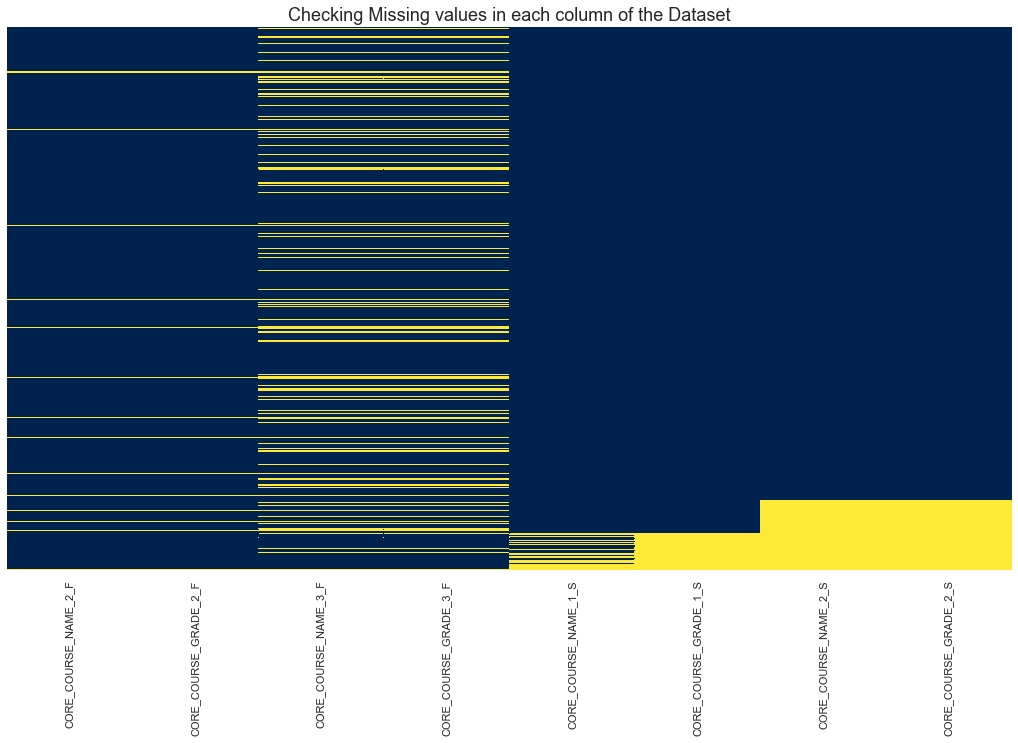

In [26]:
# Visualisin the dataset for missin values.
col_having_null_value= hr_data.columns[hr_data.isnull().any()].tolist()
plt.figure(figsize=(18,10))
sns.heatmap(hr_data[col_having_null_value].isnull(),yticklabels=False,cbar=False,cmap='cividis')
plt.title('Checking Missing values in each column of the Dataset',
          fontdict={'fontsize':18})
plt.show() # From below plot we can infer that there missng values in the column with yellow patches.

In [27]:
##Treating categorical missing values through Most Common Class Method.
##One approach to imputing categorical features is to replace missing values with the most common class and storing in the new object called 'hr_data1'
hr_data1 = hr_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [28]:
#Checking new dataset after missing value treatment
hr_data1.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,200802,CHEM 1151,A,CHEM 1151L,A,On Campus,0,150.0,4.00,SCHOOL 50,2.560836,No Information,2.571478,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,200902,ECON 2105,A,ENGL 1102,A,Off Campus,1,69.0,2.89,SCHOOL 389,3.000000,College/Beyond,3.000000,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,201102,ENGL 1102,A,ENVS 1105,A,On Campus,1,150.0,3.39,SCHOOL 82,2.000000,High School,4.000000,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,200708,ANTH 1107,A,COMM 1110,A,ENGL 1101,B,200802,ENGL 1102,A,HIST 2112,A,On Campus,1,150.0,2.93,SCHOOL 180,3.000000,College/Beyond,3.000000,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,200902,COMM 1110,A,ENGL 1101,A,Off Campus,1,69.0,3.86,SCHOOL 2,3.000000,College/Beyond,2.000000,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [29]:
#After missing value treating, from the below results it is evident that there is no missing values in the new dataset 'hr_data1' just created.
((hr_data1.isnull() | hr_data1.isna()).sum() * 100 / hr_data1.index.size).round(2)

STUDENT IDENTIFIER          0.0
STDNT_AGE                   0.0
STDNT_GENDER                0.0
STDNT_BACKGROUND            0.0
IN_STATE_FLAG               0.0
INTERNATIONAL_STS           0.0
STDNT_MAJOR                 0.0
STDNT_MINOR                 0.0
STDNT_TEST_ENTRANCE_COMB    0.0
FIRST_TERM                  0.0
CORE_COURSE_NAME_1_F        0.0
CORE_COURSE_GRADE_1_F       0.0
CORE_COURSE_NAME_2_F        0.0
CORE_COURSE_GRADE_2_F       0.0
CORE_COURSE_NAME_3_F        0.0
CORE_COURSE_GRADE_3_F       0.0
SECOND_TERM                 0.0
CORE_COURSE_NAME_1_S        0.0
CORE_COURSE_GRADE_1_S       0.0
CORE_COURSE_NAME_2_S        0.0
CORE_COURSE_GRADE_2_S       0.0
HOUSING_STS                 0.0
RETURNED_2ND_YR             0.0
DISTANCE_FROM_HOME          0.0
HIGH_SCHL_GPA               0.0
HIGH_SCHL_NAME              0.0
FATHER_HI_EDU_CD            0.0
FATHER_HI_EDU_DESC          0.0
MOTHER_HI_EDU_CD            0.0
MOTHER_HI_EDU_DESC          0.0
DEGREE_GROUP_CD             0.0
DEGREE_G

In [30]:
#Checking number of missing value counts, just to ensure that there is no missing values in the dataset.
hr_data1.isna().sum()
#print(hr_data1.shape)

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
HOUSING_STS                 0
RETURNED_2ND_YR             0
DISTANCE_FROM_HOME          0
HIGH_SCHL_GPA               0
HIGH_SCHL_NAME              0
FATHER_HI_EDU_CD            0
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_CD            0
MOTHER_HI_EDU_DESC          0
DEGREE_GROUP_CD             0
DEGREE_GROUP_DESC           0
FIRST_TERM_ATTEMPT_HRS      0
FIRST_TERM

##### As observed from the above result, there is No missing/NaN values in the dataset and now dataset is ready for the  Analysis. #####

# DATA ANALYSIS

In [31]:
# After dataset is free from missing values, it is now ready for analysis, since dataset 'hr_data1' has nearly 40 colums with different
# Categories so it is best approach to segment the dataset before starting the analysis.
#This segment is done based on problem and definition, segments are formed based on 'students demograpic profile','Students' Performance' and ' Studnets Financial Background'.


#Students Demograpic Profile

Std_Demograpic= hr_data1[['STUDENT IDENTIFIER','STDNT_AGE','STDNT_GENDER','STDNT_BACKGROUND',
                          'IN_STATE_FLAG','INTERNATIONAL_STS','HOUSING_STS','DISTANCE_FROM_HOME',
                          'RETURNED_2ND_YR']]

In [32]:
#Students Performance
Std_Performance= hr_data1[['STUDENT IDENTIFIER','HIGH_SCHL_GPA','HIGH_SCHL_NAME','STDNT_MAJOR','STDNT_MINOR','STDNT_TEST_ENTRANCE_COMB','DEGREE_GROUP_CD',
                              'DEGREE_GROUP_DESC','FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F',
                              'CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F',
                              'FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS', 'SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S','CORE_COURSE_NAME_2_S',
                              'CORE_COURSE_GRADE_2_S', 'SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','RETURNED_2ND_YR']]

In [33]:
#Studnets Financial Background
Std_Financial= hr_data1[['STUDENT IDENTIFIER','FATHER_HI_EDU_CD','FATHER_HI_EDU_DESC','MOTHER_HI_EDU_CD',
                                'MOTHER_HI_EDU_DESC','GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED',
                                'RETURNED_2ND_YR']]

In [65]:
#Now will start analyzing the data based on segments.

## Students Demograpic Profile Analysis ##

In [34]:
#Count the student background unique value counts 
Std_Demograpic['STDNT_BACKGROUND'].value_counts()

BGD 1    2081
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [35]:
#Count the student background unique value counts in terms of percentage
Std_Demograpic['STDNT_BACKGROUND'].value_counts(normalize = True)

BGD 1    0.612239
BGD 3    0.278611
BGD 4    0.040894
BGD 2    0.031186
BGD 6    0.027655
BGD 7    0.005590
BGD 5    0.002354
BGD 8    0.001471
Name: STDNT_BACKGROUND, dtype: float64

In [36]:
pd.crosstab(Std_Demograpic['STDNT_BACKGROUND'], Std_Demograpic['RETURNED_2ND_YR'])
#Observing stdnt background in terms of attrition(RETURNED_2ND_YR)

RETURNED_2ND_YR,0,1
STDNT_BACKGROUND,,
BGD 1,477,1604
BGD 2,24,82
BGD 3,170,777
BGD 4,26,113
BGD 5,4,4
BGD 6,14,80
BGD 7,7,12
BGD 8,1,4


<AxesSubplot:xlabel='STDNT_BACKGROUND', ylabel='count'>

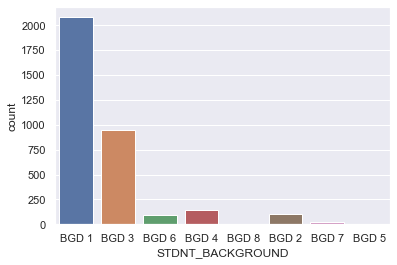

In [37]:
sns.countplot(x = 'STDNT_BACKGROUND', data = Std_Demograpic)

In [38]:
#From the above visualization, it can be seen that BGD 6,7, 8 can be merged to BGD5 for better insights
Std_Demograpic['STDNT_BACKGROUND'] = Std_Demograpic['STDNT_BACKGROUND'].replace({'BGD 6': 'BGD 5', 'BGD 7': 'BGD 5', 'BGD 8': 'BGD 5'})

<ipython-input-38-23405b215e29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Std_Demograpic['STDNT_BACKGROUND'] = Std_Demograpic['STDNT_BACKGROUND'].replace({'BGD 6': 'BGD 5', 'BGD 7': 'BGD 5', 'BGD 8': 'BGD 5'})


In [39]:
#Cross tab analysis with respect to Attrition
pd.crosstab(Std_Demograpic['STDNT_BACKGROUND'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
STDNT_BACKGROUND,,
BGD 1,477,1604
BGD 2,24,82
BGD 3,170,777
BGD 4,26,113
BGD 5,26,100


Text(0, 0.5, 'Number of Students')

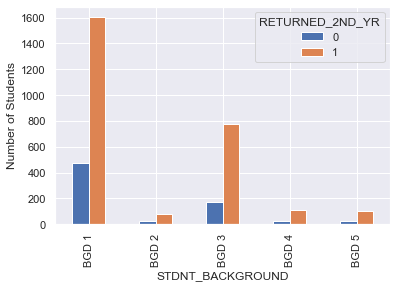

In [40]:
pd.crosstab(Std_Demograpic['STDNT_BACKGROUND'], Std_Demograpic['RETURNED_2ND_YR']).plot(kind='bar')
plt.ylabel("Number of Students")

<AxesSubplot:xlabel='STDNT_BACKGROUND', ylabel='count'>

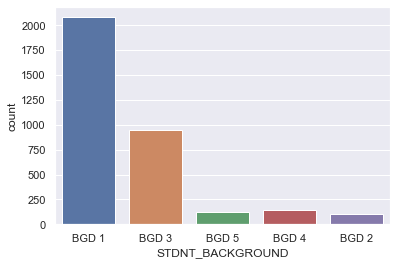

In [41]:
#Visual representation of STD Background
sns.countplot(x = 'STDNT_BACKGROUND', data = Std_Demograpic)
#From the graph it is evident that majority of the students are from BGD1.

F:\anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


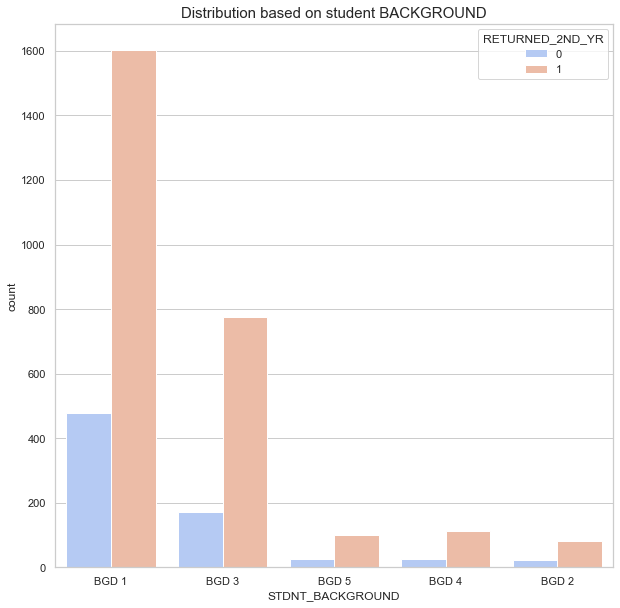

In [42]:
# Distribution based on student BACKGRONND
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.countplot(Std_Demograpic['STDNT_BACKGROUND'],hue=Std_Demograpic['RETURNED_2ND_YR'],palette='coolwarm')
plt.title('Distribution based on student BACKGROUND',fontdict={'fontsize':15})
plt.show()

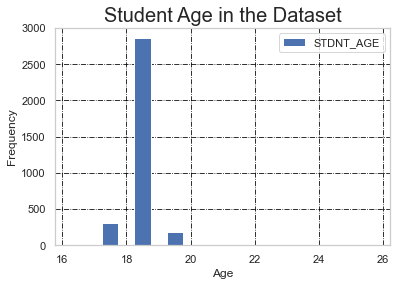

In [43]:
Std_Demograpic[['STDNT_AGE']].plot(kind='hist',rwidth=0.5)
plt.grid(color='black', linestyle='-.', linewidth=0.8)
plt.xlabel("Age")
plt.title('Student Age in the Dataset',fontdict={'fontsize':20})
plt.show()
#From the graph it is evident that students between 18 to 20 are more in number.

In [44]:
#Indicator of whether Student is in same state as university
Std_Demograpic['IN_STATE_FLAG'].value_counts()

Y    3062
N     337
Name: IN_STATE_FLAG, dtype: int64

In [45]:
#Retained since IN_STATE_FLAG distributed as 90% Y and 10 % N
Std_Demograpic['IN_STATE_FLAG'].value_counts(normalize = True)

Y    0.900853
N    0.099147
Name: IN_STATE_FLAG, dtype: float64

In [46]:
#Crosstab analysis
pd.crosstab(Std_Demograpic['IN_STATE_FLAG'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
IN_STATE_FLAG,,
N,89,248
Y,634,2428


In [47]:
# Replacing values in 'IN_STATE_FLAG' , N=0 & Y=1
Std_Demograpic['IN_STATE_FLAG'] = Std_Demograpic['IN_STATE_FLAG'].map({'N' : 0, 'Y' : 1})


<ipython-input-47-b2bcebc70b14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Std_Demograpic['IN_STATE_FLAG'] = Std_Demograpic['IN_STATE_FLAG'].map({'N' : 0, 'Y' : 1})


In [48]:
#Ensure these values are replaced correctly.
pd.crosstab(Std_Demograpic['IN_STATE_FLAG'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
IN_STATE_FLAG,,
0,89,248
1,634,2428


F:\anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


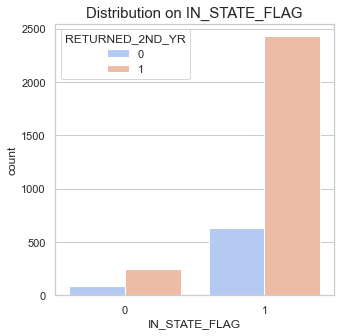

In [49]:
#sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.countplot(Std_Demograpic['IN_STATE_FLAG'],hue=Std_Demograpic['RETURNED_2ND_YR'],palette='coolwarm')
plt.title('Distribution on IN_STATE_FLAG',fontdict={'fontsize':15})
plt.show()

In [50]:
# 'INTERNATIONAL_STS' specifies wheather indicator of whether Student is an International Student
Std_Demograpic['INTERNATIONAL_STS'].value_counts()

N    3372
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [51]:
#Distribution in terms of percentage
Std_Demograpic['INTERNATIONAL_STS'].value_counts(normalize = True)

N    0.992056
Y    0.007944
Name: INTERNATIONAL_STS, dtype: float64

In [52]:
#'INTERNATIONAL_STS' in terms of student attrition
pd.crosstab(Std_Demograpic['INTERNATIONAL_STS'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
INTERNATIONAL_STS,,
N,711,2661
Y,12,15


<AxesSubplot:xlabel='INTERNATIONAL_STS'>

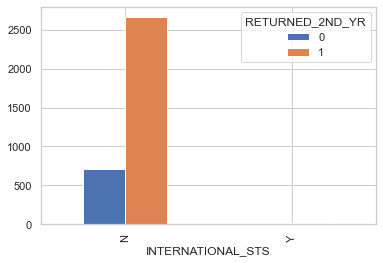

In [53]:
pd.crosstab(Std_Demograpic['INTERNATIONAL_STS'], Std_Demograpic['RETURNED_2ND_YR']).plot(kind='bar')

In [54]:
# Student house distance from university, here 0 implies student who stays in the university campus
Std_Demograpic['DISTANCE_FROM_HOME'].describe()

count    3399.000000
mean       99.834321
std       234.364320
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [55]:
pd.crosstab(Std_Demograpic['DISTANCE_FROM_HOME'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
DISTANCE_FROM_HOME,,
0.0,128,543
59.0,8,45
69.0,266,1135
90.0,64,184
91.0,2,16
...,...,...
1854.0,1,0
2203.0,1,0
2221.0,1,0


In [56]:
#Getting the 90th quantile value.
Std_Demograpic.DISTANCE_FROM_HOME.quantile(0.90)

150.0

In [57]:
#If the distance is greater than 150 then replace the distaance values with the value 150. This is simplify the analysis further.
Std_Demograpic['DISTANCE_FROM_HOME'] = np.where(Std_Demograpic['DISTANCE_FROM_HOME'] > 150, 150, Std_Demograpic['DISTANCE_FROM_HOME'])

<ipython-input-57-370a3f670a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Std_Demograpic['DISTANCE_FROM_HOME'] = np.where(Std_Demograpic['DISTANCE_FROM_HOME'] > 150, 150, Std_Demograpic['DISTANCE_FROM_HOME'])


<AxesSubplot:>

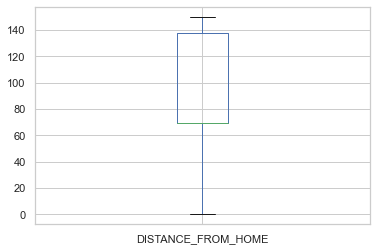

In [58]:
#From the box plot we can observe that there is no outliers
Std_Demograpic.DISTANCE_FROM_HOME.plot(kind = 'box')

In [59]:
#Cross check if the substituion is appropriate.
Std_Demograpic.DISTANCE_FROM_HOME.describe()

count    3399.000000
mean       79.512462
std        51.201583
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max       150.000000
Name: DISTANCE_FROM_HOME, dtype: float64

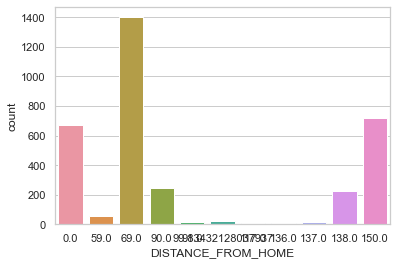

In [60]:
sns.countplot(x = 'DISTANCE_FROM_HOME', data = Std_Demograpic)
plt.show()

In [61]:
#Column 'HOUSING_STS' implies Indicator of whether the student is staying in campus or outside.
Std_Demograpic['HOUSING_STS'].value_counts()

Off Campus    1981
On Campus     1418
Name: HOUSING_STS, dtype: int64

<AxesSubplot:xlabel='HOUSING_STS', ylabel='count'>

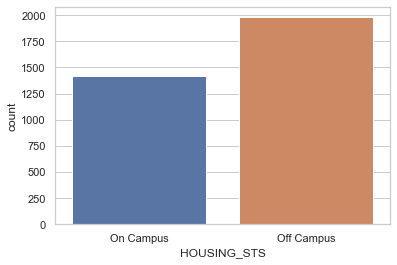

In [62]:
#Visualise 'HOUSING_STS' distribution
sns.countplot(x = 'HOUSING_STS', data = Std_Demograpic)

In [63]:
#Replacing 'Off campus' as 0 and 'On campus' as 1
Std_Demograpic['HOUSING_STS'] = Std_Demograpic['HOUSING_STS'].map({'Off Campus' : 0, 'On Campus' : 1})

<ipython-input-63-4598003359ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Std_Demograpic['HOUSING_STS'] = Std_Demograpic['HOUSING_STS'].map({'Off Campus' : 0, 'On Campus' : 1})


In [64]:
pd.crosstab(Std_Demograpic['HOUSING_STS'], Std_Demograpic['RETURNED_2ND_YR'])

RETURNED_2ND_YR,0,1
HOUSING_STS,,
0,389,1592
1,334,1084


<AxesSubplot:xlabel='HOUSING_STS'>

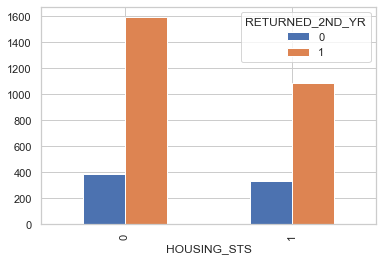

In [65]:
pd.crosstab(Std_Demograpic['HOUSING_STS'], Std_Demograpic['RETURNED_2ND_YR']).plot(kind = 'bar')

In [66]:
Std_Demograpic.head(5)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,HOUSING_STS,DISTANCE_FROM_HOME,RETURNED_2ND_YR
0,7808615,18,F,BGD 1,1,N,1,150.0,0
1,7830063,19,F,BGD 1,0,N,0,69.0,1
2,7847538,18,M,BGD 1,1,N,1,150.0,1
3,8006429,18,M,BGD 1,1,N,1,150.0,1
4,7962680,18,F,BGD 1,1,N,0,69.0,1


In [ ]:
###Dataset Std_Demograpic is now ready for Modelling###

# Students Performance Analysis ##

In [67]:
Std_Performance['STDNT_MAJOR'].nunique()

54

In [68]:
#Check for unique categories in the column 'STDNT_MAJOR'
Std_Performance['STDNT_MAJOR'].value_counts()

Undeclared                        460
Biology                           361
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
Engineering Studies                60
English Language/Literature        60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [69]:
# Replacing those categorical variable name whose number of counts are less than 80 with 'Miscellaneous' in STDNT_MAJOR column
list=['Undeclared', 'Mathematics', 'Art', 'Political Science','Accounting','Chemistry', 'Pre-Engineering/RETP',
      'English Language/Literature', 'Joint Enrollment - Accel','History and Secondary Ed', 'History', 'Engineering Studies',
      'Computer Science - Systems','Management','Theatre Education', 'Marketing', 'Communication','French with Teacher Cert',
      'English and Secondary Ed','Mathematics and Secondary Ed', 'Finance', 'French','Health Science',
      'Spec Ed: Gen. Curr. - Reading', 'Music','Middle Grades Education', 'Geology','Management Information Systems',
      'Art Education','Applied Computer Science', 'Information Technology', 'Sociology','Computer Science - Games',
      'Spanish', 'General Studies/AS','Biology and Secondary Ed', 'Chemistry and Secondary Ed','Health and Physical Education',
      'Liberal Arts','Spanish with Teacher Cert', 'Earth and Space Science','Early Admission - Accel']

Std_Performance['STDNT_MAJOR'].replace(list,'Miscellaneous',inplace=True)
Std_Performance['STDNT_MAJOR'].value_counts()

F:\anacondas\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Miscellaneous                1629
Biology                       361
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Psychology                    155
Pre-Business                  133
Theatre Arts                  131
Music Performance              99
Criminal Justice               98
Music Education                96
General Business               85
Exercise Science               81
Name: STDNT_MAJOR, dtype: int64

In [70]:
#Now the unique values in the colum is reduced from 54 to 13
Std_Performance['STDNT_MAJOR'].nunique()

13

In [71]:
#'STDNT_MAJOR':Student's Major course in University
Std_Performance['STDNT_MAJOR'].value_counts().head()

Miscellaneous                1629
Biology                       361
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Name: STDNT_MAJOR, dtype: int64

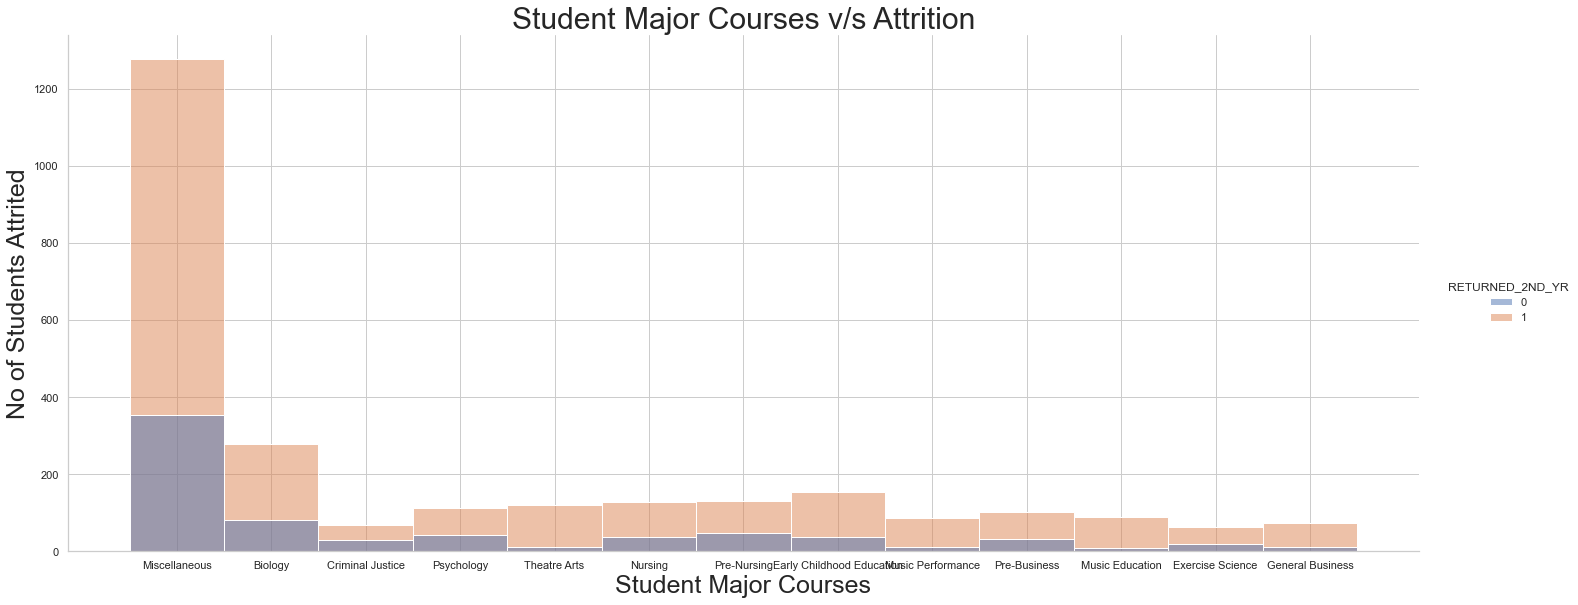

In [73]:
#sns.set(rc={"figure.figsize": (5, 25)}); np.random.seed(0)
#sns.set_theme(); np.random.seed(0)
#sns.set_style("whitegrid")
b=sns.displot(Std_Performance, x="STDNT_MAJOR", hue="RETURNED_2ND_YR", height=8, aspect=2.5)
plt.title('Student Major Courses v/s Attrition',fontdict={'fontsize':30})
b.set_axis_labels("Student Major Courses", "No of Students Attrited",fontsize=25)


#for p in f.patches:
#    f.annotate(format(p.get_height(), '.1f'), 
#                   (p.get_x() + p.get_width() / 2., p.get_height()), 
#                   ha = 'center', va = 'center', 
#                   xytext = (0, 9), 
#                   textcoords = 'offset points')
#b.legend(fontsize=5)
#b.set_xlabel("X Label",fontsize=30)
#b.set_ylabel("Y Label",fontsize=20)

In [74]:
Std_Performance['STDNT_MINOR'].value_counts().sort_values(ascending=False)
#Almost 93% of the students have 'N' as their minor subject. 

N                                3159
Spanish                            26
Psychology                         19
Music                              19
Foundations of Business            15
Communication                      14
History                            13
Criminal Justice                   12
Theatre Arts                       12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Professional Writing                6
Art History                         6
Marketing                           6
Sociology                           5
English Language/Literature         5
Art                                 5
French                              4
Chemistry                           4
Biology                             4
Political Science                   4
Accounting                          4
International Business              3
Health Science                      3
Exercise Science                    3
Economics   

In [75]:
#Assuming that there is no 'N'  minor subject, dropping the column('STDNT_MINOR').
Std_Performance=Std_Performance.drop('STDNT_MINOR',axis=1)

In [76]:
#Dropping the variables 
#('FIRST_TERM',
#'CORE_COURSE_NAME_1_F',
#'CORE_COURSE_GRADE_1_F',
#'CORE_COURSE_NAME_2_F',
#'CORE_COURSE_GRADE_2_F', 
#'CORE_COURSE_NAME_3_F',
#'CORE_COURSE_GRADE_3_F',
#'SECOND_TERM', 
#'CORE_COURSE_NAME_1_S',
#'CORE_COURSE_GRADE_1_S', 
#'CORE_COURSE_NAME_2_S',
#'CORE_COURSE_GRADE_2_S').
#These variables have many levels and the grades of the students can be got from the variables FIRST_TERM_EARNED_HOURS and SECOND_TERM_EARNED_HOURS.
Std_Performance=Std_Performance.drop(['FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S'],axis=1)

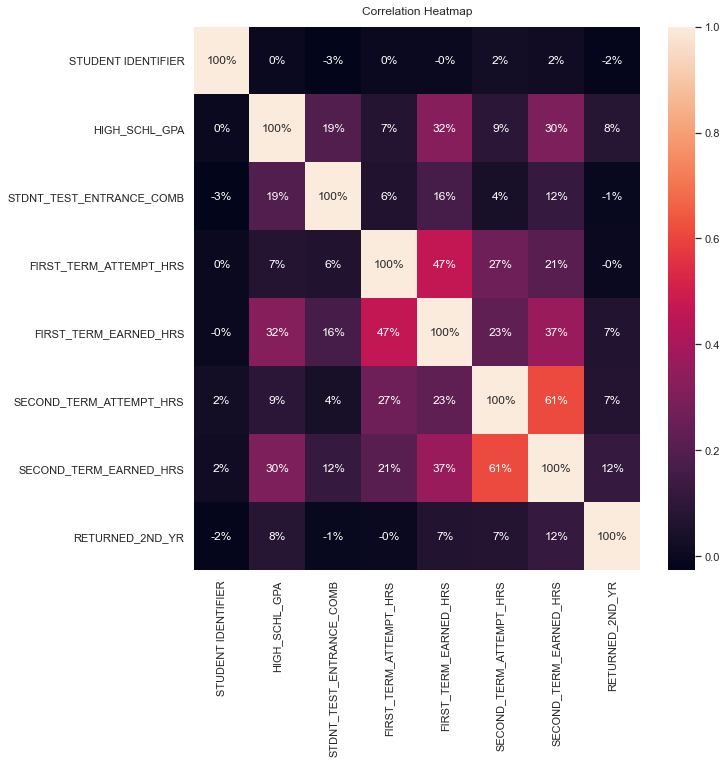

In [77]:
#Visualize the correlation matrix for high correlation columns, remove correlated columns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
hm=sns.heatmap(Std_Performance.corr(), annot=True, fmt='.0%')
hm.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [78]:
# Droping SECOND_TERM_ATTEMPT_HRS since it has high correlation with SECOND_TERM_EARNED_HRS similiarly for firtst term.
Std_Performance=Std_Performance.drop(['FIRST_TERM_ATTEMPT_HRS', 'SECOND_TERM_ATTEMPT_HRS'],axis=1)

In [79]:
#Dropping 'DEGREE_GROUP_DESC' because this column has almost 99.5% of the values are 'Bachelors', form which no inference can be drawn.
Std_Performance=Std_Performance.drop(['DEGREE_GROUP_DESC'],axis=1)

<AxesSubplot:>

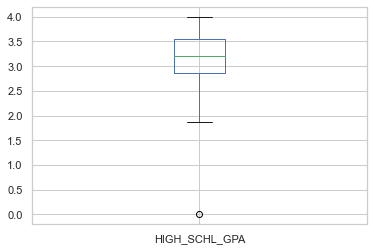

In [80]:
#From the box it is evident that there is only 'one' outlier
Std_Performance.HIGH_SCHL_GPA.plot(kind = 'box')

In [81]:
#This column gives informarion on 'Student's High School GPA score'
Std_Performance.HIGH_SCHL_GPA.describe()

count    3399.000000
mean        3.202738
std         0.451840
min         0.000000
25%         2.870000
50%         3.202738
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [82]:
# It is evident that there is only one row with value ==0, treat this row with its median value.
Std_Performance.loc[hr_data1['HIGH_SCHL_GPA'] == 0]

,STUDENT IDENTIFIER,HIGH_SCHL_GPA,HIGH_SCHL_NAME,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,DEGREE_GROUP_CD,FIRST_TERM_EARNED_HRS,SECOND_TERM_EARNED_HRS,RETURNED_2ND_YR
2815,8035871,0.0,SCHOOL 16,Exercise Science,910.0,B,9,13.0,0


In [83]:
#Treating outlier with median of the 'HIGH_SCHL_GPA'column
Std_Performance['HIGH_SCHL_GPA'] = np.where(Std_Performance['HIGH_SCHL_GPA'] == 0, 3.20, Std_Performance['HIGH_SCHL_GPA'])

In [84]:
Std_Performance.HIGH_SCHL_GPA.describe()

count    3399.000000
mean        3.203679
std         0.448486
min         1.870000
25%         2.872500
50%         3.202738
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

<AxesSubplot:>

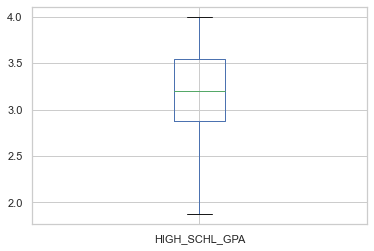

In [85]:
#From the box plot there is no outlier observed in the column 'HIGH_SCHL_GPA'
Std_Performance.HIGH_SCHL_GPA.plot(kind = 'box')

In [86]:
pd.crosstab(Std_Performance['HIGH_SCHL_GPA'], Std_Performance['RETURNED_2ND_YR']).head()

RETURNED_2ND_YR,0,1
HIGH_SCHL_GPA,,
1.87,0,1
1.92,0,1
1.94,0,1
2.00,2,8
2.04,0,1


No handles with labels found to put in legend.


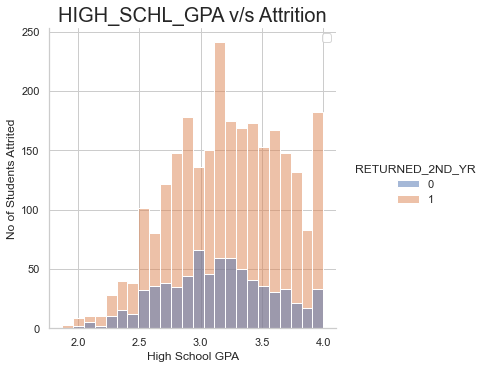

In [87]:
a=sns.displot(Std_Performance, x="HIGH_SCHL_GPA", hue="RETURNED_2ND_YR")
plt.title('HIGH_SCHL_GPA v/s Attrition',fontdict={'fontsize':20})
a.set_axis_labels("High School GPA", "No of Students Attrited")
plt.legend()
plt.show()
#a=sns.FacetGrid(data=Std_Performance,hue='RETURNED_2ND_YR', height=7,aspect=1).map(plt.hist,'HIGH_SCHL_GPA',bins=25,alpha=0.5)
#sns.set_style("whitegrid")
#sns.color_palette(['red','green'])
#sns.color_palette('Set3')

In [88]:
Std_Performance.head(5)

,STUDENT IDENTIFIER,HIGH_SCHL_GPA,HIGH_SCHL_NAME,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,DEGREE_GROUP_CD,FIRST_TERM_EARNED_HRS,SECOND_TERM_EARNED_HRS,RETURNED_2ND_YR
0,7808615,4.00,SCHOOL 50,Miscellaneous,1150.0,B,16,14.0,0
1,7830063,2.89,SCHOOL 389,Miscellaneous,1190.0,B,18,18.0,1
2,7847538,3.39,SCHOOL 82,Miscellaneous,1030.0,B,15,14.0,1
3,8006429,2.93,SCHOOL 180,Miscellaneous,1220.0,B,13,14.0,1
4,7962680,3.86,SCHOOL 2,Miscellaneous,1190.0,B,12,12.0,1


In [89]:
#Dropping variables ('HIGH_SCHL_NAME','DEGREE_GROUP_CD') - does not provide any information regarding attrition.
Std_Performance=Std_Performance.drop(['HIGH_SCHL_NAME','DEGREE_GROUP_CD'],axis=1)

In [90]:
Std_Performance.isna().sum()

STUDENT IDENTIFIER          0
HIGH_SCHL_GPA               0
STDNT_MAJOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM_EARNED_HRS       0
SECOND_TERM_EARNED_HRS      0
RETURNED_2ND_YR             0
dtype: int64

In [ ]:
###Dataset Std_Performance is now ready for Modelling###

# Students Financial

In [91]:
Std_Financial.head(5)

,STUDENT IDENTIFIER,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,7808615,2.560836,No Information,2.571478,No Information,0,0,0,0.0,0
1,7830063,3.000000,College/Beyond,3.000000,College/Beyond,570000,1355760,785760,459300.0,1
2,7847538,2.000000,High School,4.000000,Other/Unknown,0,0,0,0.0,1
3,8006429,3.000000,College/Beyond,3.000000,College/Beyond,0,0,0,0.0,1
4,7962680,3.000000,College/Beyond,2.000000,High School,835920,1355760,519840,278340.0,1


In [92]:
#Dropping variables ( 'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD'). 'HIGH_SCHL_NAME' - does not provide any information regarding attrition.
#'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD' - these are only codes for the variables which give their description respectively.
Std_Financial=Std_Financial.drop(['FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD'],axis=1)

In [93]:
Std_Financial.head(5)

,STUDENT IDENTIFIER,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,7808615,No Information,No Information,0,0,0,0.0,0
1,7830063,College/Beyond,College/Beyond,570000,1355760,785760,459300.0,1
2,7847538,High School,Other/Unknown,0,0,0,0.0,1
3,8006429,College/Beyond,College/Beyond,0,0,0,0.0,1
4,7962680,College/Beyond,High School,835920,1355760,519840,278340.0,1


In [94]:
#Father and mother educational status
Std_Financial['FATHER_HI_EDU_DESC'].value_counts()

High School                  1335
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [95]:
Std_Financial['MOTHER_HI_EDU_DESC'].value_counts()

College/Beyond               1500
High School                  1222
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [96]:
#Replace No information with other/Unknown
Std_Financial['FATHER_HI_EDU_DESC'] = Std_Financial['FATHER_HI_EDU_DESC'].replace({'No Information': 'Other/Unknown'})

In [97]:
Std_Financial['FATHER_HI_EDU_DESC'].value_counts()

High School                  1335
College/Beyond               1309
Other/Unknown                 658
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [98]:
#Replace No information with other/Unknown
Std_Financial['MOTHER_HI_EDU_DESC'] = Std_Financial['MOTHER_HI_EDU_DESC'].replace({'No Information':'Other/Unknown'})

In [99]:
Std_Financial['MOTHER_HI_EDU_DESC'].value_counts()

College/Beyond               1500
High School                  1222
Other/Unknown                 606
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

<AxesSubplot:xlabel='FATHER_HI_EDU_DESC', ylabel='count'>

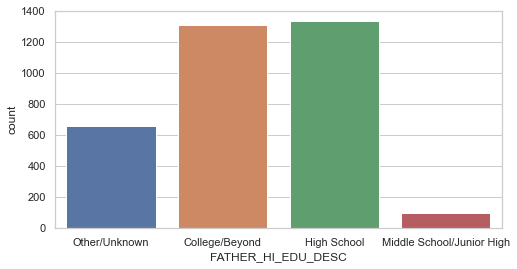

In [100]:
#Visualising Father educational infomation for students
plt.figure(figsize = (8, 4))
sns.countplot(x = 'FATHER_HI_EDU_DESC', data = Std_Financial)

<AxesSubplot:xlabel='MOTHER_HI_EDU_DESC', ylabel='count'>

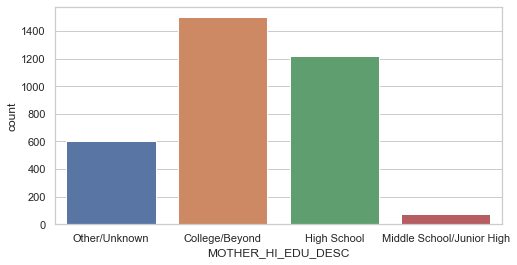

In [101]:
#Visualising Mother educational infomation for students
plt.figure(figsize = (8, 4))
sns.countplot(x = 'MOTHER_HI_EDU_DESC', data = Std_Financial)

F:\anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


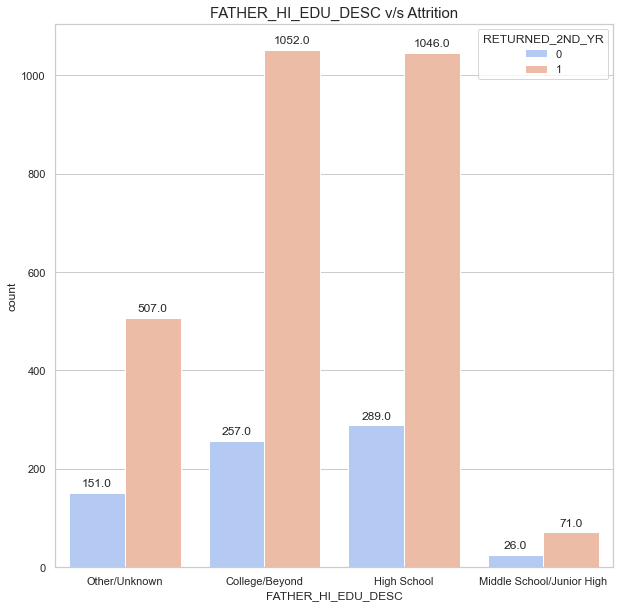

In [102]:
# Distribution based on Father and mother edu desc with respect to Attrition.
#sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
f=sns.countplot(Std_Financial['FATHER_HI_EDU_DESC'],hue=Std_Demograpic['RETURNED_2ND_YR'],palette='coolwarm')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('FATHER_HI_EDU_DESC v/s Attrition',fontdict={'fontsize':15})
plt.show()

F:\anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


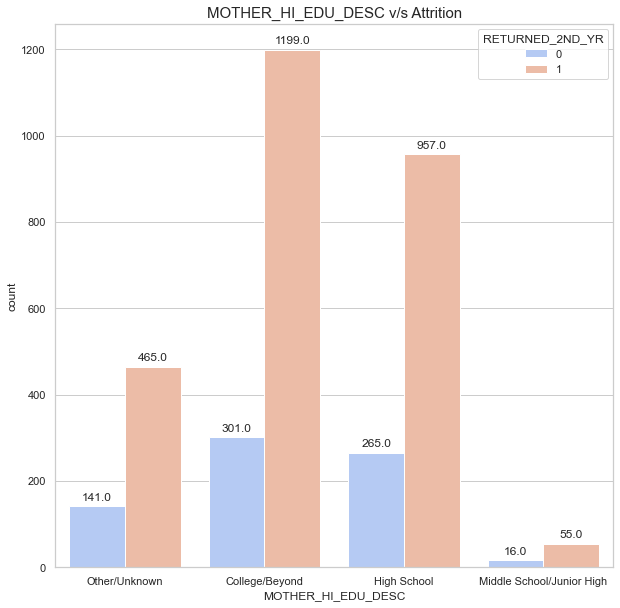

In [103]:
#sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
g=sns.countplot(Std_Financial['MOTHER_HI_EDU_DESC'],hue=Std_Demograpic['RETURNED_2ND_YR'],palette='coolwarm')
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('MOTHER_HI_EDU_DESC v/s Attrition',fontdict={'fontsize':15})
plt.show()

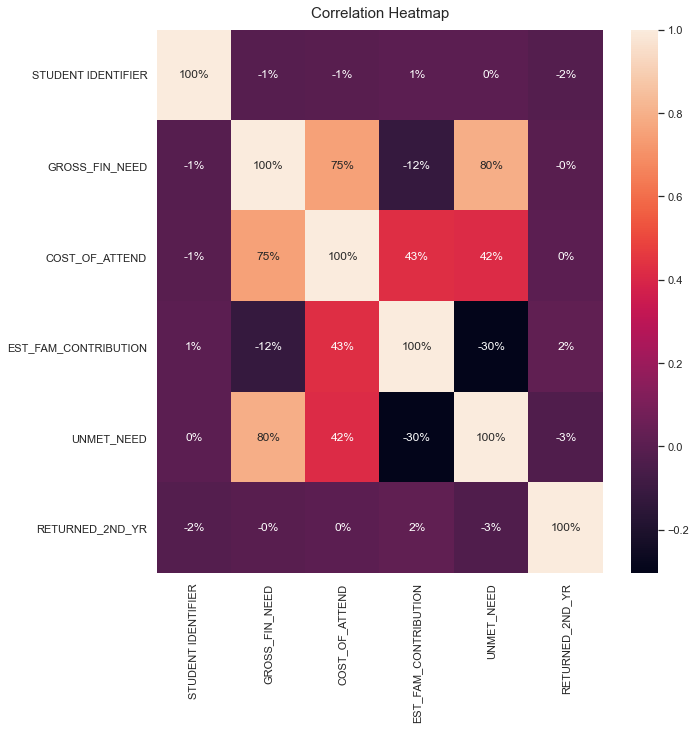

In [104]:
#Correlation matrix for Std_Financial
#Visualize the correlation matrix for high correlation columns, remove correlated columns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
hm=sns.heatmap(Std_Financial.corr(), annot=True, fmt='.0%')
hm.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

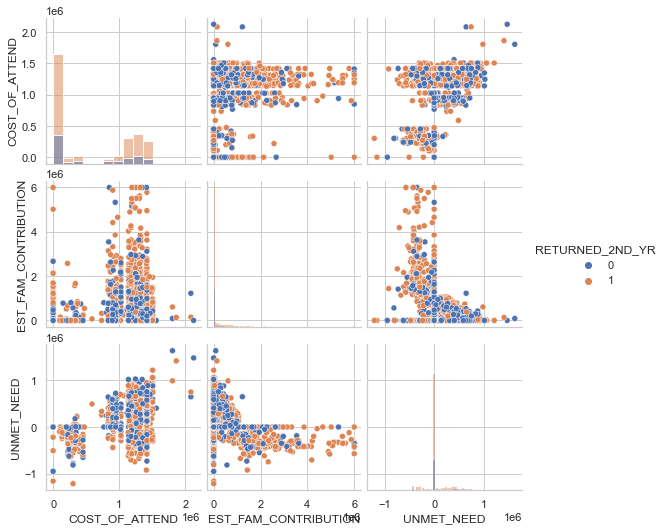

In [105]:
sns.pairplot(Std_Financial,x_vars=['COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED'], y_vars=['COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION','UNMET_NEED'],kind='scatter',diag_kind='hist', hue='RETURNED_2ND_YR')
#plt.title('Pair Plot Comparison Between Financial Variables',fontdict={'fontsize':15})

In [106]:
#From the co-relation plot, we can see that there is a strong co-relation between Gross financial need & Course fees and Gross financial need & unmet need. 
#Therefore, dropping variable 'GROSS_FIN_NEED'
Std_Financial=Std_Financial.drop('GROSS_FIN_NEED',axis=1)

In [107]:
Std_Financial.head(5)

,STUDENT IDENTIFIER,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,7808615,Other/Unknown,Other/Unknown,0,0,0.0,0
1,7830063,College/Beyond,College/Beyond,1355760,785760,459300.0,1
2,7847538,High School,Other/Unknown,0,0,0.0,1
3,8006429,College/Beyond,College/Beyond,0,0,0.0,1
4,7962680,College/Beyond,High School,1355760,519840,278340.0,1


In [ ]:
###Dataset Std_Financial is now ready for Modelling###
###Will now combine datasets Std_Demograpic Std_Performance Std_Financial for modelling.

In [108]:
#Combining all 3 dataset.
Final_dataset=pd.concat([Std_Demograpic,Std_Performance,Std_Financial],axis=1)

In [109]:
Final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3399 non-null   int64  
 1   STDNT_AGE                 3399 non-null   int64  
 2   STDNT_GENDER              3399 non-null   object 
 3   STDNT_BACKGROUND          3399 non-null   object 
 4   IN_STATE_FLAG             3399 non-null   int64  
 5   INTERNATIONAL_STS         3399 non-null   object 
 6   HOUSING_STS               3399 non-null   int64  
 7   DISTANCE_FROM_HOME        3399 non-null   float64
 8   RETURNED_2ND_YR           3399 non-null   int64  
 9   STUDENT IDENTIFIER        3399 non-null   int64  
 10  HIGH_SCHL_GPA             3399 non-null   float64
 11  STDNT_MAJOR               3399 non-null   object 
 12  STDNT_TEST_ENTRANCE_COMB  3399 non-null   float64
 13  FIRST_TERM_EARNED_HRS     3399 non-null   int64  
 14  SECOND_T

In [110]:
#Dropping coloum Student identifier
Final_dataset=Final_dataset.drop('STUDENT IDENTIFIER',axis=1)

In [111]:
Final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3399
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3399 non-null   int64  
 1   STDNT_GENDER              3399 non-null   object 
 2   STDNT_BACKGROUND          3399 non-null   object 
 3   IN_STATE_FLAG             3399 non-null   int64  
 4   INTERNATIONAL_STS         3399 non-null   object 
 5   HOUSING_STS               3399 non-null   int64  
 6   DISTANCE_FROM_HOME        3399 non-null   float64
 7   RETURNED_2ND_YR           3399 non-null   int64  
 8   HIGH_SCHL_GPA             3399 non-null   float64
 9   STDNT_MAJOR               3399 non-null   object 
 10  STDNT_TEST_ENTRANCE_COMB  3399 non-null   float64
 11  FIRST_TERM_EARNED_HRS     3399 non-null   int64  
 12  SECOND_TERM_EARNED_HRS    3399 non-null   float64
 13  RETURNED_2ND_YR           3399 non-null   int64  
 14  FATHER_H

In [ ]:
#In this dataset , column 'RETURNED_2ND_YR' Indicates attrition.

# Model Building

In [112]:
Final_dataset1=pd.get_dummies(Final_dataset)

In [113]:
Final_dataset1.head()

,STDNT_AGE,IN_STATE_FLAG,HOUSING_STS,DISTANCE_FROM_HOME,RETURNED_2ND_YR,HIGH_SCHL_GPA,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM_EARNED_HRS,SECOND_TERM_EARNED_HRS,RETURNED_2ND_YR,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR,STDNT_GENDER_F,STDNT_GENDER_M,STDNT_BACKGROUND_BGD 1,STDNT_BACKGROUND_BGD 2,STDNT_BACKGROUND_BGD 3,STDNT_BACKGROUND_BGD 4,STDNT_BACKGROUND_BGD 5,INTERNATIONAL_STS_N,INTERNATIONAL_STS_Y,STDNT_MAJOR_Biology,STDNT_MAJOR_Criminal Justice,STDNT_MAJOR_Early Childhood Education,STDNT_MAJOR_Exercise Science,STDNT_MAJOR_General Business,STDNT_MAJOR_Miscellaneous,STDNT_MAJOR_Music Education,STDNT_MAJOR_Music Performance,STDNT_MAJOR_Nursing,STDNT_MAJOR_Pre-Business,STDNT_MAJOR_Pre-Nursing,STDNT_MAJOR_Psychology,STDNT_MAJOR_Theatre Arts,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_Other/Unknown
0,18,1,1,150.0,0,4.00,1150.0,16,14.0,0,0,0,0.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,19,0,0,69.0,1,2.89,1190.0,18,18.0,1,1355760,785760,459300.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,18,1,1,150.0,1,3.39,1030.0,15,14.0,1,0,0,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,18,1,1,150.0,1,2.93,1220.0,13,14.0,1,0,0,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,18,1,0,69.0,1,3.86,1190.0,12,12.0,1,1355760,519840,278340.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [114]:
X=Final_dataset1.drop(['RETURNED_2ND_YR'],axis=1)

In [115]:
y=Final_dataset1['RETURNED_2ND_YR']

In [116]:
y.head(5)

,RETURNED_2ND_YR,RETURNED_2ND_YR,RETURNED_2ND_YR
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [117]:
y = y.T.drop_duplicates().T

In [118]:
y.head(5)

,RETURNED_2ND_YR
0,0
1,1
2,1
3,1
4,1


In [119]:
X.head(5)

,STDNT_AGE,IN_STATE_FLAG,HOUSING_STS,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM_EARNED_HRS,SECOND_TERM_EARNED_HRS,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_GENDER_F,STDNT_GENDER_M,STDNT_BACKGROUND_BGD 1,STDNT_BACKGROUND_BGD 2,STDNT_BACKGROUND_BGD 3,STDNT_BACKGROUND_BGD 4,STDNT_BACKGROUND_BGD 5,INTERNATIONAL_STS_N,INTERNATIONAL_STS_Y,STDNT_MAJOR_Biology,STDNT_MAJOR_Criminal Justice,STDNT_MAJOR_Early Childhood Education,STDNT_MAJOR_Exercise Science,STDNT_MAJOR_General Business,STDNT_MAJOR_Miscellaneous,STDNT_MAJOR_Music Education,STDNT_MAJOR_Music Performance,STDNT_MAJOR_Nursing,STDNT_MAJOR_Pre-Business,STDNT_MAJOR_Pre-Nursing,STDNT_MAJOR_Psychology,STDNT_MAJOR_Theatre Arts,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_Other/Unknown
0,18,1,1,150.0,4.00,1150.0,16,14.0,0,0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,19,0,0,69.0,2.89,1190.0,18,18.0,1355760,785760,459300.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,18,1,1,150.0,3.39,1030.0,15,14.0,0,0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,18,1,1,150.0,2.93,1220.0,13,14.0,0,0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,18,1,0,69.0,3.86,1190.0,12,12.0,1355760,519840,278340.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


# Gradient Boosting Classifier
#Splitting data into training and test datasets in 80:20 ratio.

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=123)
clf.fit(X_train,y_train)

F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(n_estimators=80, random_state=123)

In [123]:
clf.score(X_test,y_test)

0.8441176470588235

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[80,100,120,140,160,180,200,220,240,260]})
mod.fit(X_train,y_train)

F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\u

F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacondas\lib\site-packages\sklearn\u

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=123),
             param_grid={'n_estimators': [80, 100, 120, 140, 160, 180, 200, 220,
                                          240, 260]})

In [126]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=160, random_state=123)

In [127]:
#The score for 160 estimators seems to be more. Therefore running the model with n_estimators = 160
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

F:\anacondas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(n_estimators=160, random_state=400)

In [128]:
clf.score(X_test,y_test)

0.8426470588235294

In [129]:
clf.feature_importances_

array([2.37191191e-02, 1.29135182e-02, 7.43432145e-03, 3.61112224e-02,
       4.40284327e-02, 2.53516279e-02, 5.26940140e-02, 4.83120453e-01,
       3.37069862e-02, 5.68202750e-02, 1.10021148e-01, 2.01962615e-03,
       2.65242211e-03, 3.73049976e-03, 4.74432070e-03, 8.32334681e-03,
       5.84093686e-03, 1.83954581e-03, 2.24174251e-03, 1.44633652e-03,
       2.60456667e-03, 1.00406397e-02, 1.65533504e-03, 1.76962790e-03,
       3.07759002e-03, 8.15552097e-05, 7.06608159e-03, 6.24775314e-03,
       1.83289012e-03, 3.05843852e-03, 8.65486836e-03, 4.53169077e-03,
       8.21873805e-03, 4.71029490e-03, 3.67909294e-06, 5.15697301e-03,
       2.53916534e-03, 2.22359664e-03, 3.05468693e-03, 2.51152364e-03,
       2.20041020e-03])

In [130]:
feature_impp=pd.Series(clf.feature_importances_,index=X.columns)
feature_impp.sort_values(ascending=False)

SECOND_TERM_EARNED_HRS                          0.483120
UNMET_NEED                                      0.110021
EST_FAM_CONTRIBUTION                            0.056820
FIRST_TERM_EARNED_HRS                           0.052694
HIGH_SCHL_GPA                                   0.044028
DISTANCE_FROM_HOME                              0.036111
COST_OF_ATTEND                                  0.033707
STDNT_TEST_ENTRANCE_COMB                        0.025352
STDNT_AGE                                       0.023719
IN_STATE_FLAG                                   0.012914
STDNT_MAJOR_Criminal Justice                    0.010041
STDNT_MAJOR_Pre-Nursing                         0.008655
STDNT_BACKGROUND_BGD 3                          0.008323
STDNT_MAJOR_Theatre Arts                        0.008219
HOUSING_STS                                     0.007434
STDNT_MAJOR_Music Education                     0.007066
STDNT_MAJOR_Music Performance                   0.006248
STDNT_BACKGROUND_BGD 4         

Text(0, 0.5, 'Feature Importance')

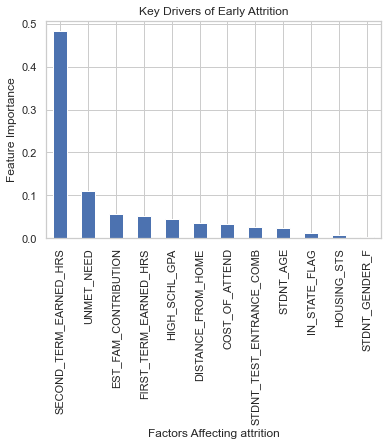

In [134]:
feature_impp.head(12).sort_values(ascending=False).plot(kind='bar')
plt.title('Key Drivers of Early Attrition')
plt.xlabel('Factors Affecting attrition')
plt.ylabel('Feature Importance')

In [132]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print('The AUC for the model :',str(metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('\n')
print('Confusion matrix :','\n',str(metrics.confusion_matrix(y_test,y_pred)))

The AUC for the model : 0.7094816566095312


Confusion matrix : 
 [[ 39  94]
 [ 13 534]]


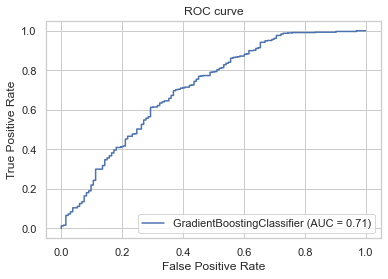

In [133]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC curve')
plt.savefig('ROC Curve.jpeg')
plt.show()

# End of Code.